# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

C:\Users\daisu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\daisu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\daisu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


Define and plot a quartic function

In [2]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())

torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

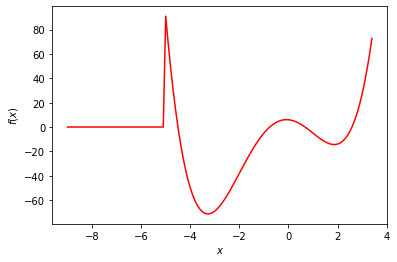

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [5]:
y.shape

torch.Size([125, 1])

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(D_in, 1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(512, D_out)
        self.relu3 = nn.ReLU()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        return out

In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, D_out),
)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
from madgrad import MADGRAD
# Complete this cell: model and training
model = CNN()
#model = model#to(device)
learning_rate = 1e-2
mse_loss = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = MADGRAD(model.parameters(), lr = learning_rate)

saveLoss=[]
for i in range(1300):
    #, y = x.to(device), y.to(device)
    y_pred = model(x) 
    loss = mse_loss(y_pred, y)
    if i%100 ==0:
        print(i, loss.item())

    optimizer.zero_grad()
   
    
    saveLoss.append(loss.detach().numpy().item())
    loss.backward()
    optimizer.step() 

0 937.5707397460938
100 136.65066528320312
200 94.22720336914062
300 92.04584503173828
400 77.55294036865234
500 61.40006637573242
600 45.79856491088867
700 37.78520965576172
800 31.395063400268555
900 24.104862213134766
1000 20.95705795288086
1100 17.113513946533203
1200 14.793708801269531


Plot the training error as a function of the epoch

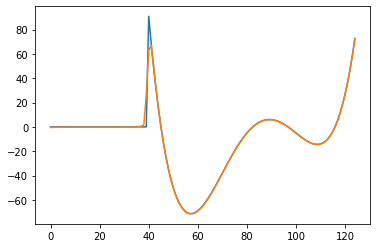

In [19]:
plt.plot(y.detach().numpy())
plt.plot(y_pred.detach().numpy())

In [20]:
saveLoss

[937.5707397460938,
 2459.02783203125,
 1341.567138671875,
 1750.9222412109375,
 1195.0111083984375,
 863.376953125,
 855.5582885742188,
 941.6382446289062,
 953.4818725585938,
 899.56689453125,
 836.2776489257812,
 801.0588989257812,
 798.7322998046875,
 811.4480590820312,
 822.1279296875,
 810.4685668945312,
 795.6389770507812,
 774.8961181640625,
 756.359130859375,
 738.1298217773438,
 720.1892700195312,
 708.71435546875,
 699.2894897460938,
 690.1983032226562,
 678.9843139648438,
 660.04931640625,
 635.51513671875,
 610.0180053710938,
 586.5904541015625,
 568.8380126953125,
 555.1204833984375,
 539.4735717773438,
 517.2095336914062,
 489.8453063964844,
 465.1386413574219,
 451.1908264160156,
 440.70684814453125,
 420.6325378417969,
 397.1134948730469,
 383.03326416015625,
 369.1311950683594,
 351.58880615234375,
 339.80523681640625,
 337.43597412109375,
 330.3630676269531,
 311.3787536621094,
 303.2808532714844,
 297.9285583496094,
 285.84576416015625,
 283.3879089355469,
 278.4372

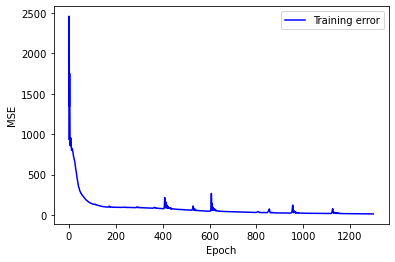

In [26]:
fig, ax = plt.subplots()
plt.plot(range(1300),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

In [22]:
%load_ext tensorboard

In [23]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/')
writer.add_graph(model, x)
writer.close()

In [24]:
tensorboard --logdir=runs

Launching TensorBoard...

KeyboardInterrupt: 

### Question: plot on the same graph the quartic function and its approximation

In [ ]:
# Complete this cell

How many parameters?

In [27]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [28]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of CNN(
  (linear1): Linear(in_features=1, out_features=1024, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=512, out_features=1, bias=True)
  (relu3): ReLU()
)>

Total number of parameters 527361



Print all the parameters (just for seeing them)

In [30]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[-0.2796],
        [ 0.5803],
        [ 0.6284],
        ...,
        [-0.5244],
        [-0.1384],
        [-0.3277]], requires_grad=True)
Parameter containing:
tensor([ 0.3791,  3.0072, -1.1274,  ..., -1.1902,  0.2491, -1.4961],
       requires_grad=True)
Parameter containing:
tensor([[ 2.2803e-02, -9.5365e-03, -1.7306e-02,  ...,  4.7022e-03,
          3.5708e-03,  2.3241e-02],
        [ 1.9499e-02,  5.1854e-01, -1.8481e-01,  ..., -3.3242e-02,
         -5.3831e-03, -4.9070e-01],
        [ 1.5632e-02,  3.2428e-01,  2.1712e-01,  ..., -4.7175e-02,
         -7.5070e-03, -7.7205e-02],
        ...,
        [ 1.3745e-01,  2.2300e+00, -1.9497e-01,  ...,  1.1134e-01,
          1.2448e-01,  3.1070e-01],
        [ 1.5265e-02,  2.7310e-02,  1.9990e-02,  ...,  7.0369e-03,
          4.8189e-03, -5.1052e-03],
        [-1.2140e-01,  1.6777e-03, -1.8432e-01,  ..., -4.0738e-02,
         -7.8728e-02,  4.4866e-02]], requires_grad=True)
Parameter containing:
tensor([ 2.9070e

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [ ]:
# Complete this cell: model and training
    

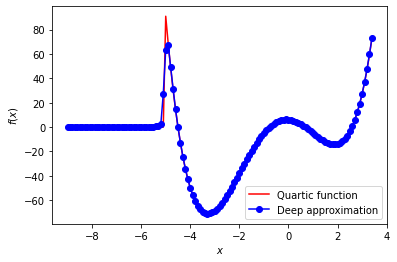

In [31]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [32]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 527361

